# Feature Engineering for Classification

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
import datetime
import re
from datetime import datetime, timedelta

In [2]:
za_data = pd.read_csv("Classification/all_files_ZAv1.csv")

In [3]:
za_data.columns

Index(['trackAppearanceCount', 'artistAppearanceCount', 'rank', 'uri',
       'artist_names', 'track_name', 'source', 'peak_rank', 'previous_rank',
       'weeks_on_chart', 'streams', 'End Date', 'Week', 'Year', 'End Date Dt',
       'Seconds since Epoch', 'End Date Aggregated', 'ArtistCount',
       'main_artist', 'isTopTen', 'Artist and Track', 'rank difference',
       'Position over Time'],
      dtype='object')

In [4]:
len(list(za_data.columns))

23

In [5]:
za_data["End Date Dt"] = za_data["End Date Dt"].apply(lambda x : datetime.strptime(x, '%Y-%m-%d'))

In [6]:
za_data.shape

(47486, 23)

In [7]:
za_data_test = za_data[za_data['End Date Dt'] > datetime(2022, 5, 26)]
za_data = za_data[za_data['End Date Dt'] <= datetime(2022, 5, 26)]

In [8]:
za_data_df = za_data[['main_artist', 'track_name', "trackAppearanceCount", "artistAppearanceCount", "rank", "peak_rank", 'previous_rank', 'weeks_on_chart', 'streams', 'ArtistCount', 'isTopTen', 'rank difference']]

In [9]:
# za_data["End Date"].unique().tolist()

In [91]:
za_data_test_first_time = za_data_test[za_data_test["trackAppearanceCount"] == 0]

In [93]:
# za_data_test_first_time

### 0. Entry Position into Chart

In [96]:
def findingtheentrypos(za_data):
    groupby_cols = ['main_artist', 'track_name']
    
    groupednum_songs = za_data.groupby(groupby_cols)["End Date"].agg("min")
    groupednum_songs_df = pd.DataFrame(groupednum_songs).reset_index()
    groupednum_songs_df.columns = groupby_cols + ["Artist Song Start Date"]
    
    groupednum_songs_df = groupednum_songs_df.drop_duplicates()
    groupednum_songs_df.shape
    
    groupednum_songs_ls = groupednum_songs_df.values.tolist()
    
    thefirstones = []
    for artsongls in groupednum_songs_ls:
        theartist = artsongls[0]
        thetrack = artsongls[1]
        thestartdate = artsongls[2]
        thefirstones.append(za_data[(za_data["main_artist"] == theartist) & (za_data["track_name"] == thetrack) & (za_data["End Date"] == thestartdate)])
        
    first_track_position_df = pd.concat(thefirstones)
    
    first_track_position_df_relevant = first_track_position_df[["main_artist", "track_name", "rank", "End Date"]]
    first_track_position_df_relevant.columns = ["main_artist", "track_name", "entry rank", "End Date"]
    
    groupednum_songs = za_data.groupby(groupby_cols)["End Date"].agg("count")
    groupednum_songs_df = pd.DataFrame(groupednum_songs).reset_index()
    groupednum_songs_df.columns = groupby_cols + ["Artist Song Count"]
    
    return groupednum_songs_df, first_track_position_df_relevant

### 1. Streams

In [98]:
def findtheMinMaxMeanStreams(za_data):
    groupedmax_streams = za_data.groupby(groupby_cols)["streams"].agg("max")
    groupedmax_streams_df = pd.DataFrame(groupedmax_streams).reset_index()
    groupedmax_streams_df.columns = groupby_cols + ["Max Streams per Song"]
    
    groupedmin_streams = za_data.groupby(groupby_cols)["streams"].agg("min")
    groupedmin_streams_df = pd.DataFrame(groupedmin_streams).reset_index()
    groupedmin_streams_df.columns = groupby_cols + ["Min Streams per Song"]
    
    groupedsum_streams = za_data.groupby(groupby_cols)["streams"].agg("sum")
    groupedsum_streams_df = pd.DataFrame(groupedsum_streams).reset_index()
    groupedsum_streams_df.columns = groupby_cols + ["Total Streams per Song"]

    groupedmean_streams = za_data.groupby(groupby_cols)["streams"].agg("mean")
    groupedmean_streams_df = pd.DataFrame(groupedmean_streams).reset_index()
    groupedmean_streams_df.columns = groupby_cols + ["Mean Streams per Song"]
    
    return groupedmax_streams_df, groupedmin_streams_df, groupedsum_streams_df, groupedmean_streams_df

### 2. Positions

In [100]:
def findtheMinMaxPositions(za_data):
    groupedpos_streams = za_data.groupby(groupby_cols)["rank"].agg("min")
    groupedpos_streams_df = pd.DataFrame(groupedpos_streams).reset_index()
    groupedpos_streams_df.columns = groupby_cols + ["Min Position per Song"]

    groupedposmax_streams = za_data.groupby(groupby_cols)["rank"].agg("max")
    groupedposmax_streams_df = pd.DataFrame(groupedposmax_streams).reset_index()
    groupedposmax_streams_df.columns = groupby_cols + ["Max Position per Song"]
    
    return groupedpos_streams_df, groupedposmax_streams_df

In [97]:
groupednum_songs_df, first_track_position_df_relevant = findingtheentrypos(za_data)

In [99]:
groupedmax_streams_df, groupedmin_streams_df, groupedsum_streams_df, groupedmean_streams_df = findtheMinMaxMeanStreams(za_data)

In [101]:
groupedpos_streams_df, groupedposmax_streams_df = findtheMinMaxPositions(za_data)

#### get the dates to use for later other positions

In [102]:
# groupeddatemin_streams = za_data.groupby(groupby_cols)['Start Date Dt'].agg("min")
# groupeddatemin_streams_df = pd.DataFrame(groupeddatemin_streams).reset_index()
# groupeddatemin_streams_df.columns = groupby_cols + ["Min Start Date per Song"]

# groupeddatemax_streams = za_data.groupby(groupby_cols)['Start Date Dt'].agg("max")
# groupeddatemax_streams_df = pd.DataFrame(groupeddatemax_streams).reset_index()
# groupeddatemax_streams_df.columns = groupby_cols + ["Max Start Date per Song"]


# groupedenddatemin_streams = za_data.groupby(groupby_cols)['End Date Dt'].agg("min")
# groupedenddatemin_streams_df = pd.DataFrame(groupedenddatemin_streams).reset_index()
# groupedenddatemin_streams_df.columns = groupby_cols + ["Min End Date per Song"]

# groupedenddatemax_streams = za_data.groupby(groupby_cols)['End Date Dt'].agg("max")
# groupedenddatemax_streams_df = pd.DataFrame(groupedenddatemax_streams).reset_index()
# groupedenddatemax_streams_df.columns = groupby_cols + ["Max End Date per Song"]

### 3. Dates

## Combine the dfs

In [25]:
groupeddf = groupedmax_streams_df

In [26]:
groupeddf["Min Streams per Song"] = groupedmin_streams_df["Min Streams per Song"]
groupeddf["Total Streams per Song"] = groupedsum_streams_df["Total Streams per Song"]
groupeddf["Mean Streams per Song"]= groupedmean_streams_df["Mean Streams per Song"]
groupeddf["Min Position per Song"] = groupedpos_streams_df["Min Position per Song"]
groupeddf["Max Position per Song"] = groupedposmax_streams_df["Max Position per Song"]
groupeddf["Artist Song Count"] = groupednum_songs_df["Artist Song Count"]
# groupeddf["Min Start Date per Song"] = groupeddatemin_streams_df["Min Start Date per Song"]
# groupeddf["Max Start Date per Song"] = groupeddatemax_streams_df["Max Start Date per Song"]
# groupeddf["Min End Date per Song"] = groupedenddatemin_streams_df["Min End Date per Song"]
# groupeddf["Max End Date per Song"] = groupedenddatemax_streams_df["Max End Date per Song"]

In [27]:
groupeddf["MaxMin Difference Position"] = groupeddf["Max Position per Song"] - groupeddf["Min Position per Song"]
groupeddf["MaxMin Difference Streams"] = groupeddf["Max Streams per Song"] - groupeddf["Min Streams per Song"]

In [28]:
groupeddf["MaxMin Ratio Position"] = groupeddf["Max Position per Song"] / groupeddf["Min Position per Song"]
groupeddf["MaxMin Ratio Streams"] = groupeddf["Max Streams per Song"] / groupeddf["Min Streams per Song"]

In [29]:
groupeddf.drop(["Max Position per Song"], inplace=True, axis=1)

In [30]:
groupeddf_startpos = groupeddf.merge(first_track_position_df_relevant[["main_artist", "track_name", "entry rank"]], left_on=["main_artist", "track_name"], right_on=["main_artist", "track_name"], how="inner")

In [31]:
groupeddf_startpos["main_art_track"] = groupeddf_startpos["main_artist"] + groupeddf_startpos["track_name"]

In [32]:
groupeddf_startpos

,main_artist,track_name,Max Streams per Song,Min Streams per Song,Total Streams per Song,Mean Streams per Song,Min Position per Song,Artist Song Count,MaxMin Difference Position,MaxMin Difference Streams,MaxMin Ratio Position,MaxMin Ratio Streams,entry rank,main_art_track
0,$NOT,Doja,23789,23789,23789,23789.000000,194,1,0,0,1.000000,1.000000,194,$NOTDoja
1,$uicideboy$,"...And to Those I Love, Thanks for Sticking Ar...",23341,23341,23341,23341.000000,182,1,0,0,1.000000,1.000000,182,"$uicideboy$...And to Those I Love, Thanks for ..."
2,2 Chainz,Bigger Than You (feat. Drake & Quavo),5994,3964,32044,4577.714286,78,7,86,2030,2.102564,1.512109,78,2 ChainzBigger Than You (feat. Drake & Quavo)
3,2 Chainz,Rule The World (feat. Ariana Grande),8536,8536,8536,8536.000000,148,1,0,0,1.000000,1.000000,148,2 ChainzRule The World (feat. Ariana Grande)
4,2 Chainz,Whip (feat. Travis Scott),9137,6924,16061,8030.500000,127,2,70,2213,1.551181,1.319613,127,2 ChainzWhip (feat. Travis Scott)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3789,grandson,Blood // Water,16448,16448,16448,16448.000000,200,1,0,0,1.000000,1.000000,200,grandsonBlood // Water
3790,lil Shordie Scott,Rocking A Cardigan in Atlanta,38151,23887,212781,30397.285714,73,7,84,14264,2.150685,1.597145,113,lil Shordie ScottRocking A Cardigan in Atlanta
3791,pewdiepie,Bitch Lasagna,5829,5829,5829,5829.000000,191,1,0,0,1.000000,1.000000,191,pewdiepieBitch Lasagna
3792,salem ilese,Mad at Disney,29285,16128,256035,21336.250000,53,12,133,13157,3.509434,1.815786,107,salem ileseMad at Disney


In [33]:
groupeddf_startpos_regress = groupeddf_startpos[['main_artist', "main_art_track", 'entry rank', 'Min Position per Song']].drop_duplicates()

In [34]:
# groupeddf_startpos_regress["main_artist"].unique().tolist()

In [35]:
# groupeddf_startpos_regress['Min Position per Song'].min()
some_artists_of_interest = ["6LACK", "9umba", "BNXN fka Buju", "Black Coffee", "Big Zulu"]

In [36]:
### do it at an artist level but maybe in groups so that you do not need a lot of data for everyone.

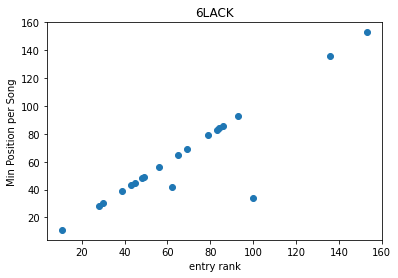

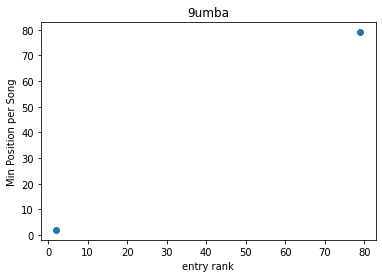

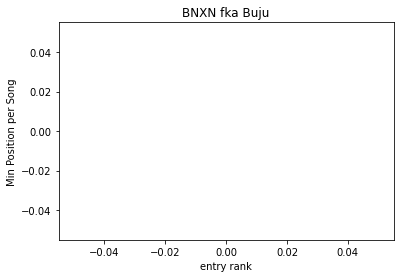

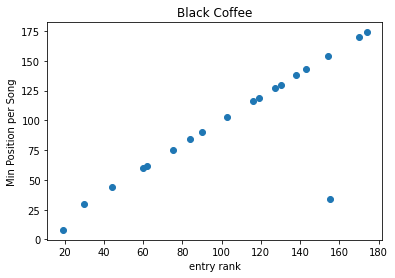

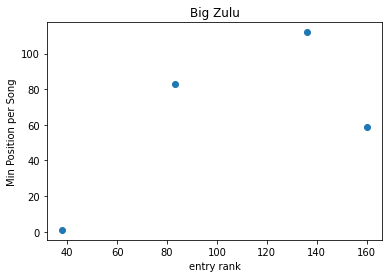

In [37]:
for theartist in some_artists_of_interest:
    number_ones = groupeddf_startpos_regress[groupeddf_startpos_regress['main_artist'] == theartist]

    x = number_ones['entry rank'].tolist()
    y = number_ones['Min Position per Song'].tolist()

    plt.scatter(x, y)
    plt.title(theartist)
    plt.xlabel('entry rank')
    plt.ylabel('Min Position per Song')
    plt.show()

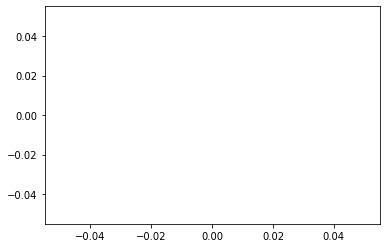

In [38]:
number_ones = groupeddf_startpos_regress[groupeddf_startpos_regress['main_artist'] == "rum.gold"]

x = number_ones['entry rank'].tolist()
y = number_ones['Min Position per Song'].tolist()

plt.scatter(x, y)
plt.show()

(1, 4)


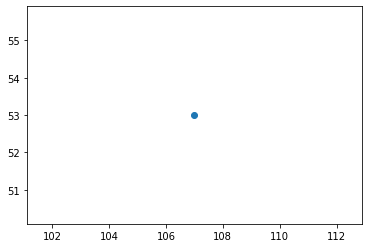

In [39]:
number_ones = groupeddf_startpos_regress[groupeddf_startpos_regress['main_artist'] == "salem ilese"]
print(number_ones.shape)
x = number_ones['entry rank'].tolist()
y = number_ones['Min Position per Song'].tolist()

plt.scatter(x, y)
plt.show()

# See this plot based on the clusters of artists you made.

### K-means

In [40]:
from sklearn.cluster import KMeans

In [41]:
kmeans_df = pd.DataFrame()
for col in groupby_cols:
    kmeans_df[col] = groupeddf[col]

In [42]:
kmeans_df

,main_artist,track_name
0,$NOT,Doja
1,$uicideboy$,"...And to Those I Love, Thanks for Sticking Ar..."
2,2 Chainz,Bigger Than You (feat. Drake & Quavo)
3,2 Chainz,Rule The World (feat. Ariana Grande)
4,2 Chainz,Whip (feat. Travis Scott)
...,...,...
3788,grandson,Blood // Water
3789,lil Shordie Scott,Rocking A Cardigan in Atlanta
3790,pewdiepie,Bitch Lasagna
3791,salem ilese,Mad at Disney


In [43]:
grouped_za_data_df = za_data_df.merge(groupeddf, left_on=["main_artist", "track_name"], right_on=["main_artist", "track_name"], how="inner")

In [44]:
# grouped_za_data_df.dropna()

In [45]:
train_groupeddf = grouped_za_data_df.drop(groupby_cols, axis=1)

In [46]:
# train_groupeddf.head(5)

### THE KMEANS

In [47]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(train_groupeddf)

In [48]:
allklabels = kmeans.labels_

In [49]:
len(grouped_za_data_df), len(train_groupeddf)

(43686, 43686)

In [50]:
grouped_za_data_df["Labels"] = allklabels

In [51]:
other_cols = ["Min Streams per Song", "Total Streams per Song", "Mean Streams per Song", "Min Position per Song", "Artist Song Count", "MaxMin Ratio Position", "MaxMin Ratio Streams", "MaxMin Difference Position", "MaxMin Difference Streams"]

In [52]:
for col in other_cols:
    grouped_za_data_df[col] = groupeddf[col]

In [53]:
grouped_za_data_df.to_csv("grouped_za_data_df.csv", index=False)

In [54]:
grouped_za_data_df.columns

Index(['main_artist', 'track_name', 'trackAppearanceCount',
       'artistAppearanceCount', 'rank', 'peak_rank', 'previous_rank',
       'weeks_on_chart', 'streams', 'ArtistCount', 'isTopTen',
       'rank difference', 'Max Streams per Song', 'Min Streams per Song',
       'Total Streams per Song', 'Mean Streams per Song',
       'Min Position per Song', 'Artist Song Count',
       'MaxMin Difference Position', 'MaxMin Difference Streams',
       'MaxMin Ratio Position', 'MaxMin Ratio Streams', 'Labels'],
      dtype='object')

In [55]:
grouped_za_data_df["main_art_track"] = grouped_za_data_df["main_artist"] + grouped_za_data_df["track_name"]

In [56]:
grouped_za_data_df = grouped_za_data_df.merge(groupeddf_startpos_regress, left_on=["main_art_track"], right_on=["main_art_track"], how="left")

In [57]:
# grouped_za_data_df

In [58]:
# grouped_za_data_df.columns = ['main_artist', 'track_name', 'Labels', 'Min Streams per Song','Total Streams per Song', 'Mean Streams per Song','Min Position per Song', 'Artist Song Count', 'MaxMin Ratio Position','MaxMin Ratio Streams', 'MaxMin Difference Position','MaxMin Difference Streams', 'main_art_track', 'main_artist_y','entry rank', 'Min Position per Song_y']

In [59]:
grouped_za_data_df.columns = ['main_artist', 'track_name', 'trackAppearanceCount', 'artistAppearanceCount', 'rank', 'peak_rank', 'previous_rank','weeks_on_chart', 'streams', 'ArtistCount', 'isTopTen', 'rank difference', 'Max Streams per Song', 'Min Streams per Song', 'Total Streams per Song', 'Mean Streams per Song', 'Min Position per Song', 'Artist Song Count','MaxMin Difference Position', 'MaxMin Difference Streams','MaxMin Ratio Position', 'MaxMin Ratio Streams', 'Labels', 'main_art_track', 'main_artist_y', 'entry rank', 'Min Position per Song_y']

In [60]:
grouped_za_data_df.drop(['main_artist_y', 'Min Position per Song_y'], axis=1, inplace=True)

In [61]:
labels_kmeans = grouped_za_data_df['Labels'].unique().tolist()

In [62]:
grouped_za_data_df = grouped_za_data_df.dropna()

(2357, 25)


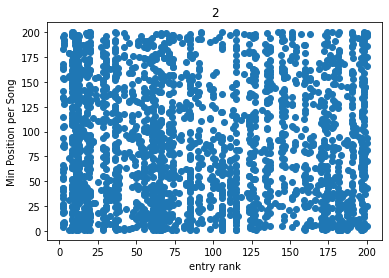

(88, 25)


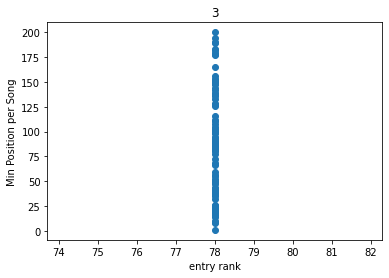

(554, 25)


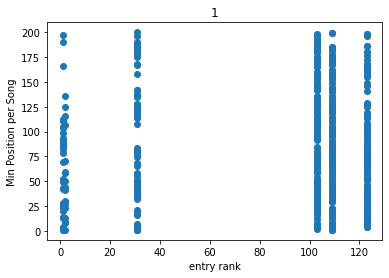

(798, 25)


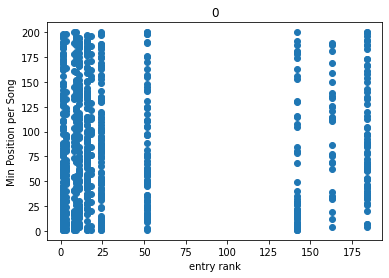

In [63]:
for thelabel in labels_kmeans:
    number_ones = grouped_za_data_df[grouped_za_data_df['Labels'] == thelabel]
    print(number_ones.shape)
    x = number_ones['entry rank'].tolist()
    y = number_ones['Min Position per Song'].tolist()

    plt.title(thelabel)
    plt.xlabel('entry rank')
    plt.ylabel('Min Position per Song')
    plt.scatter(x, y)
    plt.show()

In [64]:
# kmeans_df

In [65]:
# groupeddf_startpos_regress

In [66]:
# groupeddf["MaxMin Difference Date"] = groupeddf["Min Start Date per Song"] - groupeddf["Max End Date per Song"]

In [67]:
grouped_za_data_df.shape

(3797, 25)

In [68]:
grouped_za_data_df = grouped_za_data_df.drop_duplicates()

In [69]:
grouped_za_data_df.shape

(3797, 25)

In [70]:
grouped_za_data_df.to_csv("grouped_za_data_df.csv", index=False)

In [71]:
grouped_za_data_df

,main_artist,track_name,trackAppearanceCount,artistAppearanceCount,rank,peak_rank,previous_rank,weeks_on_chart,streams,ArtistCount,...,Mean Streams per Song,Min Position per Song,Artist Song Count,MaxMin Difference Position,MaxMin Difference Streams,MaxMin Ratio Position,MaxMin Ratio Streams,Labels,main_art_track,entry rank
0,$NOT,Doja,0,0,194,194,-1,1,23789,1,...,23789.000000,194.0,1.0,0.0,0.0,1.000000,1.000000,2,$NOTDoja,194
1,$uicideboy$,"...And to Those I Love, Thanks for Sticking Ar...",0,0,182,182,-1,1,23341,1,...,23341.000000,182.0,1.0,0.0,0.0,1.000000,1.000000,2,"$uicideboy$...And to Those I Love, Thanks for ...",182
2,2 Chainz,Bigger Than You (feat. Drake & Quavo),0,0,78,78,-1,1,5994,3,...,4577.714286,78.0,7.0,86.0,2030.0,2.102564,1.512109,2,2 ChainzBigger Than You (feat. Drake & Quavo),78
3,2 Chainz,Bigger Than You (feat. Drake & Quavo),1,1,90,78,78,2,5265,3,...,8536.000000,148.0,1.0,0.0,0.0,1.000000,1.000000,2,2 ChainzBigger Than You (feat. Drake & Quavo),78
4,2 Chainz,Bigger Than You (feat. Drake & Quavo),2,2,146,78,90,3,3964,3,...,8030.500000,127.0,2.0,70.0,2213.0,1.551181,1.319613,2,2 ChainzBigger Than You (feat. Drake & Quavo),78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3792,Bernice West,Sonop-Blom,10,10,122,120,128,11,20539,1,...,16448.000000,200.0,1.0,0.0,0.0,1.000000,1.000000,2,Bernice WestSonop-Blom,145
3793,Bernice West,Sonop-Blom,11,11,123,120,122,12,22196,1,...,30397.285714,73.0,7.0,84.0,14264.0,2.150685,1.597145,2,Bernice WestSonop-Blom,145
3794,Bernice West,Sonop-Blom,12,12,122,120,123,13,23110,1,...,5829.000000,191.0,1.0,0.0,0.0,1.000000,1.000000,2,Bernice WestSonop-Blom,145
3795,Bernice West,Sonop-Blom,13,13,109,109,122,14,25412,1,...,21336.250000,53.0,12.0,133.0,13157.0,3.509434,1.815786,2,Bernice WestSonop-Blom,145


### Linear Regression

In [72]:
import matplotlib.pyplot as plt

In [73]:
grouped_za_data_df.columns

Index(['main_artist', 'track_name', 'trackAppearanceCount',
       'artistAppearanceCount', 'rank', 'peak_rank', 'previous_rank',
       'weeks_on_chart', 'streams', 'ArtistCount', 'isTopTen',
       'rank difference', 'Max Streams per Song', 'Min Streams per Song',
       'Total Streams per Song', 'Mean Streams per Song',
       'Min Position per Song', 'Artist Song Count',
       'MaxMin Difference Position', 'MaxMin Difference Streams',
       'MaxMin Ratio Position', 'MaxMin Ratio Streams', 'Labels',
       'main_art_track', 'entry rank'],
      dtype='object')

### Linear Regression

In [74]:
thelabelsmade = grouped_za_data_df["Labels"].unique().tolist()

In [75]:
for alabel in thelabelsmade:

    pred_df_one = grouped_za_data_df[grouped_za_data_df["Labels"] == alabel]

    pred_df_one = pred_df_one.drop(["main_artist"], axis=1)

    # Build linear regression model using TV and Radio as predictors
    # Split data into predictors X and output Y
    predictors = ['Artist Song Count', 'Total Streams per Song', 'Min Streams per Song', 'MaxMin Difference Position', 'MaxMin Ratio Streams']
    X = pred_df_one[predictors]
    y = pred_df_one['Min Position per Song']

    # Initialise and fit model
    lm = LinearRegression()
    model = lm.fit(X, y)

    print(f'alpha = {model.intercept_}')
    print(f'betas = {model.coef_}')

    all_preds = model.predict(X)
    
    print("Mean squared error: %.2f" % mean_squared_error(y, all_preds))
    # The coefficient of determination: 1 is perfect prediction
    print("Coefficient of determination: %.2f" % r2_score(y, all_preds))

alpha = 173.68452573742732
betas = [ 1.23621688e-01 -2.62981092e-07 -1.79929638e-03 -7.42811440e-01
 -2.93587487e+00]
Mean squared error: 925.12
Coefficient of determination: 0.75
alpha = 155.28872671782892
betas = [-1.32752971e-01 -2.44022971e-06 -1.58213849e-03 -5.95649463e-01
 -9.66216048e-01]
Mean squared error: 982.73
Coefficient of determination: 0.67
alpha = 152.055325884309
betas = [ 1.60167791e-01 -1.99180763e-06 -1.10197072e-03 -6.38290880e-01
 -2.50181476e+00]
Mean squared error: 1032.57
Coefficient of determination: 0.67
alpha = 163.96493797207927
betas = [ 7.62491154e-02  1.30785512e-08 -1.67250849e-03 -6.94881797e-01
 -2.14449046e+00]
Mean squared error: 1174.85
Coefficient of determination: 0.67


In [76]:
grouped_za_data_df.columns

Index(['main_artist', 'track_name', 'trackAppearanceCount',
       'artistAppearanceCount', 'rank', 'peak_rank', 'previous_rank',
       'weeks_on_chart', 'streams', 'ArtistCount', 'isTopTen',
       'rank difference', 'Max Streams per Song', 'Min Streams per Song',
       'Total Streams per Song', 'Mean Streams per Song',
       'Min Position per Song', 'Artist Song Count',
       'MaxMin Difference Position', 'MaxMin Difference Streams',
       'MaxMin Ratio Position', 'MaxMin Ratio Streams', 'Labels',
       'main_art_track', 'entry rank'],
      dtype='object')

In [77]:
for alabel in thelabelsmade:

    pred_df_one = grouped_za_data_df[grouped_za_data_df["Labels"] == alabel]

    pred_df_one = pred_df_one.drop(["main_artist", "track_name", "main_art_track"], axis=1)

    # Build linear regression model using TV and Radio as predictors
    # Split data into predictors X and output Y
#     predictors = ['Artist Song Count', 'Total Streams per Song', 'Min Streams per Song', 'MaxMin Difference Position', 'MaxMin Ratio Streams']
    predictors = list(pred_df_one.columns)
    X = pred_df_one[predictors]
    y = pred_df_one['Min Position per Song']

    # Initialise and fit model
    lm = LinearRegression()
    model = lm.fit(X, y)

    print(f'alpha = {model.intercept_}')
    print(f'betas = {model.coef_}')

    all_preds = model.predict(X)
    
    print("Mean squared error: %.2f" % mean_squared_error(y, all_preds))
    # The coefficient of determination: 1 is perfect prediction
    print("Coefficient of determination: %.2f" % r2_score(y, all_preds))

alpha = -8.100187187665142e-13
betas = [ 2.90416218e-14 -1.44405035e-16  3.23645075e-16 -1.74459275e-16
  2.15135122e-16 -2.94139708e-14 -1.88591272e-18  3.66179405e-14
  2.33763951e-14 -3.11026850e-16  3.95007810e-19  1.23159685e-17
  3.10667980e-18 -2.01443814e-17  1.00000000e+00 -4.57535588e-17
 -7.52812809e-16  1.10564999e-17  1.44827671e-16  8.63674025e-17
  0.00000000e+00 -3.04069157e-17]
Mean squared error: 0.00
Coefficient of determination: 1.00
alpha = -8.242295734817162e-13
betas = [-7.48718766e-15  1.15398529e-14  4.67288165e-15 -5.01334785e-15
 -2.52257520e-15 -7.07850360e-15  1.12525132e-17  1.11022302e-16
  0.00000000e+00 -5.19799880e-15  0.00000000e+00 -1.46303543e-16
  5.07994039e-19  1.26460332e-16  1.00000000e+00 -2.10370309e-15
  1.39176874e-16 -2.60192236e-17 -2.34310229e-15  3.70737574e-15
  0.00000000e+00  0.00000000e+00]
Mean squared error: 0.00
Coefficient of determination: 1.00
alpha = 1.2789769243681803e-13
betas = [-2.23044552e-13  9.06602074e-16 -5.77764943e

In [78]:
pred_df_one = grouped_za_data_df

pred_df_one = pred_df_one.drop(["main_artist", "track_name", "main_art_track"], axis=1)

# Build linear regression model using TV and Radio as predictors
# Split data into predictors X and output Y
#     predictors = ['Artist Song Count', 'Total Streams per Song', 'Min Streams per Song', 'MaxMin Difference Position', 'MaxMin Ratio Streams']
predictors = list(pred_df_one.columns)
X = pred_df_one[predictors]
y = pred_df_one['Min Position per Song']

# Initialise and fit model
lm = LinearRegression()
model = lm.fit(X, y)

print(f'alpha = {model.intercept_}')
print(f'betas = {model.coef_}')

all_preds = model.predict(X)

print("Mean squared error: %.2f" % mean_squared_error(y, all_preds))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y, all_preds))

alpha = -3.126388037344441e-13
betas = [-6.23963582e-14 -3.00155993e-16 -8.21380712e-17 -1.41020258e-16
 -8.33561135e-17  6.19449552e-14 -2.50896167e-18 -3.58904038e-15
 -5.12016997e-16  6.63369625e-16  1.66121822e-18  9.62011064e-17
 -3.07260336e-19 -6.85144333e-17  1.00000000e+00  4.34797768e-16
  2.94679579e-16  1.34906673e-17  9.21018562e-17 -7.62705170e-17
  4.88875283e-16  2.69677665e-16]
Mean squared error: 0.00
Coefficient of determination: 1.00


In [79]:
# from sklearn import linear_model

# clf = linear_model.PoissonRegressor()

# clf.fit(X, y)

# clf.score(X, y)

# clf.coef_

# clf.intercept_

# clf.predict([[1, 1], [3, 4]])

### Descriptions

In [80]:
# df.groupby("date").agg({"duration": np.sum, "user_id": pd.Series.nunique})

In [81]:
grouped_za_data_df["Labels"].unique().tolist()

[2, 3, 1, 0]

In [82]:
kmeans_df_zero = grouped_za_data_df[grouped_za_data_df["Labels"] == 0]
kmeans_df_one = grouped_za_data_df[grouped_za_data_df["Labels"] == 1]
kmeans_df_two = grouped_za_data_df[grouped_za_data_df["Labels"] == 2]
kmeans_df_three = grouped_za_data_df[grouped_za_data_df["Labels"] == 3]

In [83]:
kmeans_df_zero.describe()

,trackAppearanceCount,artistAppearanceCount,rank,peak_rank,previous_rank,weeks_on_chart,streams,ArtistCount,isTopTen,rank difference,...,Total Streams per Song,Mean Streams per Song,Min Position per Song,Artist Song Count,MaxMin Difference Position,MaxMin Difference Streams,MaxMin Ratio Position,MaxMin Ratio Streams,Labels,entry rank
count,798.000000,798.000000,798.000000,798.000000,798.000000,798.000000,798.000000,798.000000,798.000000,798.000000,...,7.980000e+02,798.000000,798.000000,798.000000,798.000000,798.000000,798.000000,798.000000,798.0,798.000000
mean,31.516291,163.218045,94.303258,15.857143,86.181704,32.837093,22340.248120,1.382206,0.424812,2.387218,...,2.214871e+05,21158.913443,87.186717,9.417293,66.849624,14960.392231,8.115235,2.112908,0.0,43.412281
std,21.654736,150.555525,57.523337,18.156220,57.331923,21.845150,14642.618543,0.486231,0.494624,15.570673,...,5.391777e+05,17508.454822,59.923615,18.882521,68.017084,34640.482605,24.354281,2.123012,0.0,60.642393
min,0.000000,0.000000,1.000000,1.000000,-1.000000,1.000000,2353.000000,1.000000,0.000000,-93.000000,...,1.084000e+03,1084.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.0,1.000000
25%,14.000000,48.000000,41.000000,7.000000,34.000000,15.000000,11033.500000,1.000000,0.000000,-4.000000,...,1.746900e+04,9689.840909,35.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.0,8.000000
50%,28.000000,109.000000,93.000000,11.000000,85.000000,29.000000,17683.000000,1.000000,0.000000,2.000000,...,3.856200e+04,17644.000000,79.000000,2.000000,57.000000,2513.500000,1.580239,1.323759,0.0,16.000000
75%,46.000000,245.750000,141.000000,21.000000,133.000000,48.000000,29496.500000,2.000000,1.000000,10.000000,...,1.674862e+05,27479.284091,136.000000,9.000000,128.000000,15753.000000,4.457955,2.315616,0.0,52.000000
max,94.000000,528.000000,200.000000,184.000000,199.000000,96.000000,99584.000000,2.000000,1.000000,66.000000,...,5.260575e+06,161456.000000,200.000000,175.000000,199.000000,359994.000000,200.000000,28.950864,0.0,184.000000


In [84]:
kmeans_df_one.describe()

,trackAppearanceCount,artistAppearanceCount,rank,peak_rank,previous_rank,weeks_on_chart,streams,ArtistCount,isTopTen,rank difference,...,Total Streams per Song,Mean Streams per Song,Min Position per Song,Artist Song Count,MaxMin Difference Position,MaxMin Difference Streams,MaxMin Ratio Position,MaxMin Ratio Streams,Labels,entry rank
count,554.000000,554.000000,554.000000,554.000000,554.000000,554.000000,554.000000,554.0,554.000000,554.000000,...,5.540000e+02,554.000000,554.000000,554.000000,554.000000,554.000000,554.000000,554.000000,554.0,554.000000
mean,63.324910,84.487365,68.689531,11.440433,65.391697,65.021661,29285.523466,1.0,0.722022,0.842960,...,2.577333e+05,18523.361849,87.243682,11.718412,71.315884,12001.947653,7.955860,1.965327,1.0,90.705776
std,45.405935,62.629113,51.162412,13.721232,49.439572,45.690834,34074.315482,0.0,0.448408,11.664023,...,5.797710e+05,12620.915895,56.308953,23.911004,69.907685,23825.525552,25.625452,1.690039,0.0,39.130954
min,0.000000,0.000000,1.000000,1.000000,-1.000000,1.000000,3426.000000,1.0,0.000000,-55.000000,...,2.133000e+03,2001.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.0,1.000000
25%,23.250000,31.000000,25.000000,3.000000,22.000000,25.000000,16700.000000,1.0,0.000000,-4.000000,...,1.422775e+04,8137.791667,41.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.0,103.000000
50%,56.000000,74.000000,61.000000,5.500000,59.500000,58.000000,19404.500000,1.0,1.000000,1.000000,...,3.650800e+04,16094.000000,79.500000,3.000000,65.500000,3029.000000,1.659601,1.370117,1.0,109.000000
75%,98.000000,127.750000,104.750000,23.000000,100.750000,100.000000,23589.500000,1.0,1.000000,6.000000,...,1.837320e+05,25901.573529,127.750000,10.750000,134.500000,13343.000000,4.255952,2.242095,1.0,109.000000
max,167.000000,236.000000,200.000000,123.000000,195.000000,169.000000,429149.000000,1.0,1.000000,44.000000,...,4.769370e+06,86062.058824,200.000000,207.000000,198.000000,268773.000000,199.000000,14.654783,1.0,123.000000


In [85]:
kmeans_df_two.describe()

,trackAppearanceCount,artistAppearanceCount,rank,peak_rank,previous_rank,weeks_on_chart,streams,ArtistCount,isTopTen,rank difference,...,Total Streams per Song,Mean Streams per Song,Min Position per Song,Artist Song Count,MaxMin Difference Position,MaxMin Difference Streams,MaxMin Ratio Position,MaxMin Ratio Streams,Labels,entry rank
count,2357.000000,2357.000000,2357.000000,2357.000000,2357.000000,2357.000000,2357.000000,2357.000000,2357.000000,2357.000000,...,2.357000e+03,2357.000000,2357.000000,2357.000000,2357.000000,2357.000000,2357.000000,2357.000000,2357.0,2357.000000
mean,10.284260,60.647433,113.334323,62.187527,79.809504,11.425541,16069.562580,1.172253,0.081884,7.332202,...,2.978988e+05,21194.437564,87.101824,12.331353,71.396266,13237.765804,8.185114,2.084060,2.0,89.397539
std,11.853082,81.214523,53.016409,50.139691,62.032891,12.030595,12116.614382,0.407936,0.274246,29.768952,...,6.938551e+05,18427.508467,60.586738,23.718283,68.510567,25237.676761,23.527951,1.863949,0.0,62.563084
min,0.000000,0.000000,2.000000,2.000000,-1.000000,1.000000,1030.000000,1.000000,0.000000,-166.000000,...,1.192000e+03,1192.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,2.0,2.000000
25%,1.000000,10.000000,69.000000,23.000000,20.000000,2.000000,8058.000000,1.000000,0.000000,-2.000000,...,1.835200e+04,9079.142857,33.000000,1.000000,0.000000,0.000000,1.000000,1.000000,2.0,30.000000
50%,6.000000,32.000000,114.000000,45.000000,78.000000,7.000000,12781.000000,1.000000,0.000000,2.000000,...,4.537500e+04,17385.952381,79.000000,3.000000,62.000000,3661.000000,1.722222,1.428433,2.0,74.000000
75%,15.000000,75.000000,160.000000,90.000000,130.000000,16.000000,20950.000000,1.000000,0.000000,17.000000,...,1.999770e+05,27235.000000,140.000000,11.000000,133.000000,15981.000000,4.761905,2.442721,2.0,145.000000
max,60.000000,531.000000,200.000000,200.000000,200.000000,62.000000,130408.000000,3.000000,1.000000,171.000000,...,7.553345e+06,225853.500000,200.000000,216.000000,199.000000,265179.000000,200.000000,23.855335,2.0,200.000000


In [86]:
kmeans_df_three.describe()

,trackAppearanceCount,artistAppearanceCount,rank,peak_rank,previous_rank,weeks_on_chart,streams,ArtistCount,isTopTen,rank difference,...,Total Streams per Song,Mean Streams per Song,Min Position per Song,Artist Song Count,MaxMin Difference Position,MaxMin Difference Streams,MaxMin Ratio Position,MaxMin Ratio Streams,Labels,entry rank
count,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.0,88.0,88.000000,...,8.800000e+01,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.0,88.0
mean,43.500000,65.647727,55.590909,2.181818,53.715909,44.500000,50488.250000,2.0,1.0,0.977273,...,1.809889e+05,24105.900335,88.931818,7.215909,58.227273,17378.886364,3.679563,1.858183,3.0,78.0
std,25.547342,26.810977,50.153932,8.439842,49.128251,25.547342,20902.976486,0.0,0.0,12.428163,...,4.659359e+05,19632.572598,54.502514,13.220020,63.047642,44888.573111,6.257105,1.424129,0.0,0.0
min,0.000000,18.000000,1.000000,1.000000,-1.000000,1.000000,21885.000000,2.0,1.0,-58.000000,...,2.177000e+03,2177.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,3.0,78.0
25%,21.750000,44.750000,6.000000,1.000000,5.750000,22.750000,34140.000000,2.0,1.0,-2.000000,...,1.639500e+04,8068.750000,42.000000,1.000000,0.000000,0.000000,1.000000,1.000000,3.0,78.0
50%,43.500000,66.500000,42.500000,1.000000,40.000000,44.500000,43510.500000,2.0,1.0,0.000000,...,3.584450e+04,18569.950000,86.500000,2.000000,38.500000,1047.000000,1.311562,1.156834,3.0,78.0
75%,65.250000,88.250000,92.250000,1.000000,91.250000,66.250000,66713.000000,2.0,1.0,4.250000,...,1.272298e+05,33744.843750,133.750000,5.000000,113.000000,13321.000000,3.568571,2.300161,3.0,78.0
max,87.000000,110.000000,165.000000,78.000000,165.000000,88.000000,102605.000000,2.0,1.0,44.000000,...,3.727199e+06,116474.968750,200.000000,69.000000,191.000000,370216.000000,47.000000,8.376199,3.0,78.0


number of artists in label
number of top 10 songs in label
